This notebook reads in the datasets that are already upsampled, standard-scaled, and train-test-split so we can use the same initial features (35) for consistency for RandomForest from Linear Models.    

In [57]:
import numpy as np
import pandas as pd
%matplotlib inline 
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

X_train = pd.read_csv('./X_train.csv', index_col=0)
X_test = pd.read_csv('./X_test.csv', index_col=0)
y_train = pd.read_csv('./y_train.csv', index_col=0)
y_test = pd.read_csv('./y_test.csv', index_col=0)

In [58]:
X_train.head()

,Unique_County,Unique_States,Avg_AdmissionDuration,Avg_ClaimDuration,Avg_Total_ClmProcedureCode,Avg_Total_ClmDiagnosisCode,DiagnosisGroupCode_count,Unique_DiagnosisGroupCode,ClmAdmitDiagnosisCode_count,Unique_ClmAdmitDiagnosisCode,...,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,Age_20-30,Age_30-40,Age_40-50,Age_50-60,Age_60-70,Age_70-80,Age_80-90,Age_90-101
3593,-0.726554,-0.625131,2.348460,1.933499,3.433855,1.468203,-0.256642,-0.249839,-0.468208,-0.522145,...,0.45,0.00,0.00,0.00,0.00,0.18,0.18,0.27,0.36,0.00
2495,0.038377,0.272537,-0.076676,-0.354683,-0.119036,-0.082437,0.667357,0.788190,0.240953,0.460143,...,0.28,0.12,0.01,0.02,0.01,0.04,0.22,0.38,0.21,0.12
952,-0.344089,-0.625131,0.668451,0.869776,0.385406,0.537213,-0.212642,-0.196607,-0.442263,-0.537988,...,0.22,0.09,0.00,0.03,0.03,0.06,0.06,0.44,0.28,0.09
1910,0.038377,-0.400714,0.996046,0.844569,0.760366,1.191422,0.315357,0.335716,-0.174165,-0.031001,...,0.39,0.10,0.00,0.00,0.02,0.06,0.22,0.51,0.16,0.04
2219,2.078190,3.863209,-0.210402,-0.251295,-0.272617,-0.231894,1.327356,1.506826,1.071190,1.394900,...,0.32,0.11,0.01,0.02,0.02,0.07,0.18,0.34,0.28,0.09


In [59]:
X_train.shape

(6865, 35)

In [60]:
X_test.shape

(2943, 35)

In [61]:
y_train = pd.Series(y_train['PotentialFraud'], dtype='int32')

In [62]:
y_test = pd.Series(y_test['PotentialFraud'], dtype='int32')

In [120]:
param_grid = {
    'criterion': ['gini'],
    'n_estimators': [100, 200, 300],
    'max_depth': [12, 13, 14], # 2 to the power of # of obs. 
    'max_features': [8,10,12],
    'min_samples_leaf': [3,4,5]
}
# {'n_estimators': 100,
#  'min_samples_leaf': 4,
#  'max_features': 10,
#  'max_depth': 13,
#  'criterion': 'gini'} RANDOMGRID 

In [121]:
from sklearn.ensemble import RandomForestClassifier 
rf_Model = RandomForestClassifier(random_state=1)  

from sklearn.model_selection import GridSearchCV, KFold 
rf_Grid = GridSearchCV(estimator=rf_Model, param_grid = param_grid, cv=KFold(shuffle= True, random_state=1), verbose=2, n_jobs=-1, scoring='roc_auc')

In [122]:
rf_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  4.5min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [12, 13, 14],
                         'max_features': [8, 10, 12],
                         'min_samples_leaf': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc', verbose=2)

In [123]:
rf_Grid.best_params_

# 1st Grid:
# {'criterion': 'gini',
#  'max_depth': 14,
#  'max_features': 12,
#  'min_samples_leaf': 3,
#  'n_estimators': 200}

# 2nd Grid:
# {'criterion': 'gini',
#  'max_depth': 14,
#  'max_features': 12,
#  'min_samples_leaf': 3,
#  'n_estimators': 200}

# 3rd Grid:
# {'criterion': 'gini',
#  'max_depth': 14,
#  'max_features': 12,
#  'min_samples_leaf': 3,
#  'n_estimators': 200}

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 12,
 'min_samples_leaf': 3,
 'n_estimators': 200}

In [125]:
rf_Grid.best_score_
# CV_1: 0.9956645627847251

# 2:0.9956645627847251

# 3:0.9956645627847251

0.9956645627847251

In [126]:
print(rf_Grid.score(X_train, y_train))
print(rf_Grid.score(X_test, y_test))
# # Initial GridSearch:
# 0.9999842132655421
# 0.9966124786403732

# 2:
# 0.9999842132655421
# 0.9966124786403732

# 3: 
# 0.9999842132655421
# 0.9966124786403732

0.9999842132655421
0.9966124786403732


In [141]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = rf_Grid.best_estimator_.predict(X_test) 
cm = confusion_matrix(y_true, y_pred)
cm

# 1st Grid:
#     array([[1374,  101],
#        [   5, 1463]]

# 2nd:
#     array([[1374,  101],
#        [   5, 1463]],

# 3rd: 
#     array([[1374,  101],
#        [   5, 1463]],

array([[1374,  101],
       [   5, 1463]], dtype=int64)

Text(24.0, 0.5, 'Actual Value')

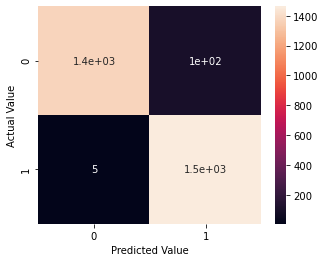

In [142]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [139]:
# Feature Importance
tree_final = rf_Grid.best_estimator_
feature_importance = list(zip(X_train.columns, tree_final.feature_importances_))
sorted(feature_importance, key=lambda imp: imp[1], reverse=True)

[('DiagnosisGroupCode_count', 0.1984068606155285),
 ('Unique_DiagnosisGroupCode', 0.16074437527365884),
 ('ClmAdmitDiagnosisCode_count', 0.10531152311566908),
 ('Unique_ClmAdmitDiagnosisCode', 0.06942544420651368),
 ('Claim_count', 0.05855130260735745),
 ('Avg_Total_ClmProcedureCode', 0.04439730103249297),
 ('Unique_patients', 0.03464574706565956),
 ('Avg_AdmissionDuration', 0.03414111662387293),
 ('Avg_TotalClaimCost', 0.021902083177269212),
 ('Avg_ClaimDuration', 0.019992912525810196),
 ('Avg_TotalClaimCost_PerPatient', 0.01805167772589489),
 ('Unique_County', 0.014923523547203502),
 ('Avg_Total_ClmDiagnosisCode', 0.01475974696626513),
 ('Avg_Total_Physician', 0.013971252710815877),
 ('Unique_States', 0.012900207527613191),
 ('Age_70-80', 0.01255998700881435),
 ('ChronicCond_Alzheimer', 0.012440959652175962),
 ('Age_60-70', 0.011523533396586613),
 ('ChronicCond_Diabetes', 0.011431929918218573),
 ('Age_50-60', 0.010870161668061987),
 ('Age_80-90', 0.01048827710216795),
 ('ChronicCond_

<BarContainer object of 35 artists>

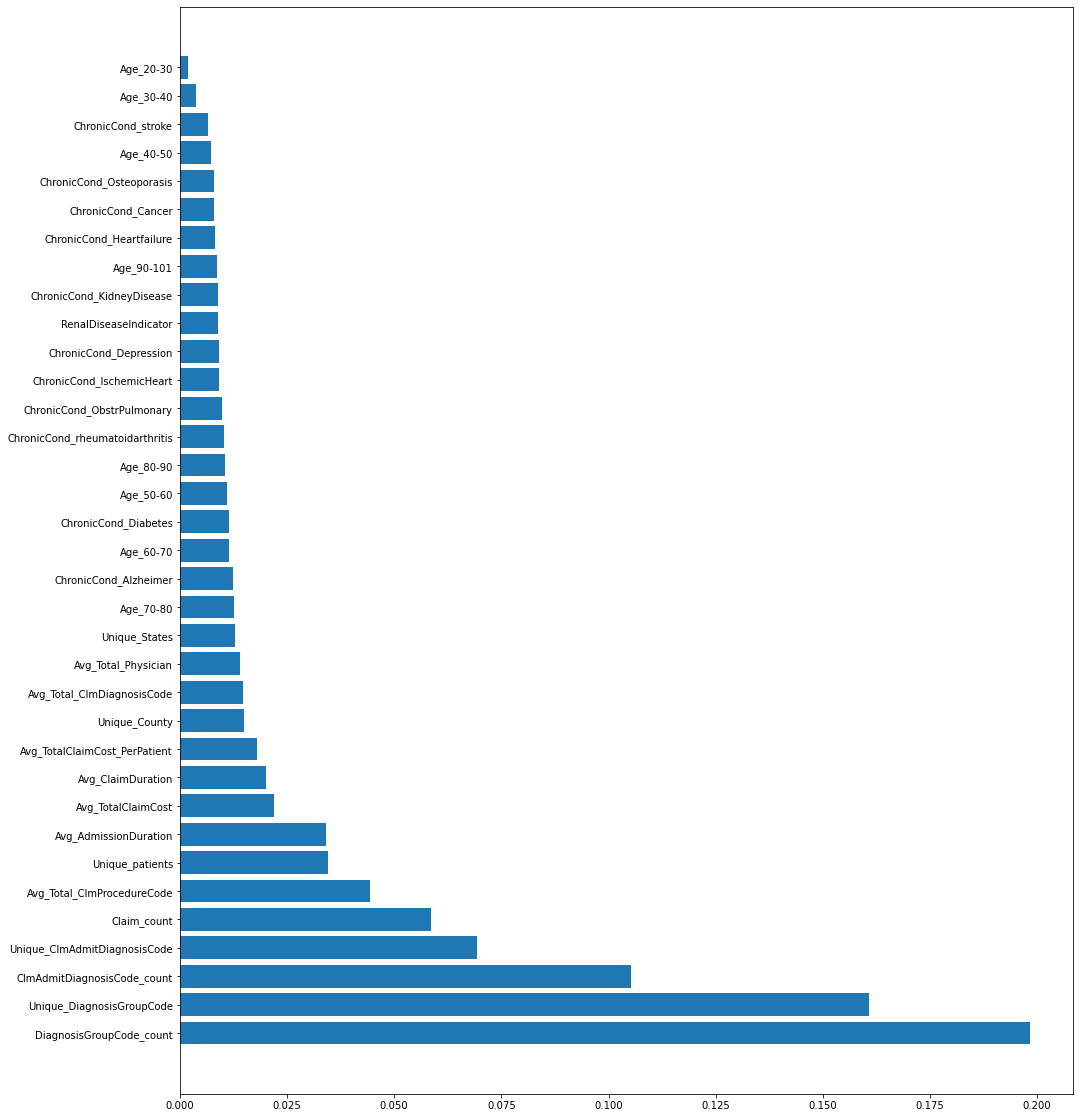

In [140]:
features, importance = zip(*sorted(feature_importance, key=lambda imp: imp[1], reverse=True))
plt.figure(figsize=(16,20))
plt.barh(features, importance)

In [82]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv=KFold(shuffle= True, random_state=1), verbose=2, n_jobs=-1, random_state=1, scoring='roc_auc')

In [83]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   54.9s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [4, 6, 8, 10, 12, 13, 14],
                                        'max_features': [5, 10, 15, 20, 25, 30,
                                                         35],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=1, verbose=2)

In [85]:
rf_RandomGrid.best_params_

# # Initial RandomGrid:
# {'n_estimators': 300,
#  'min_samples_leaf': 6,
#  'max_features': 10,
#  'max_depth': 12,
#  'criterion': 'gini'}

# 2nd RandomGrid:
# {'n_estimators': 500,
#  'min_samples_leaf': 2,
#  'max_features': 30,
#  'max_depth': 12,
#  'criterion': 'gini'}

# 3rd RandomGrid:
# {'n_estimators': 100,
#  'min_samples_leaf': 2,
#  'max_features': 25,
#  'max_depth': 12,
#  'criterion': 'gini'}

# POST EXTRA RANDOM STATE:
# {'n_estimators': 100,
#  'min_samples_leaf': 4,
#  'max_features': 10,
#  'max_depth': 13,
#  'criterion': 'gini'}

# POST EXTRA RANDOM STATE 2:
# {'n_estimators': 100,
#  'min_samples_leaf': 4,
#  'max_features': 10,
#  'max_depth': 13,
#  'criterion': 'gini'}  

# POST EXTRA RANDOM STATE 3:
# {'n_estimators': 100,
#  'min_samples_leaf': 4,
#  'max_features': 10,
#  'max_depth': 13,
#  'criterion': 'gini'}

{'n_estimators': 100,
 'min_samples_leaf': 4,
 'max_features': 10,
 'max_depth': 13,
 'criterion': 'gini'}

In [128]:
rf_RandomGrid.best_score_

# Initial RandomGrid:
# 0.9507647487254187

# 2nd RandomGrid:
# 0.9564457392571013

# 3rd RandomGrid:
# 0.9580480699198833

# POST EXTRA RANDOM STATE:
# 0.956882738528769

# # POST EXTRA RANDOM STATE 2:
# 0.956882738528769

# POST EXTRA RANDOM STATE 3:
# 0.956882738528769

0.956882738528769

In [129]:
print(rf_RandomGrid.score(X_train, y_train))
print(rf_RandomGrid.score(X_test, y_test))

# Initial RandomGrid:
# 0.9798980335032775
# 0.9551478083588175

# 2nd RandomGrid:
# 0.984122359796067
# 0.9605844376486579

# 3rd RandomGrid:
# 0.9845593590677348
# 0.9629629629629629

# POST EXTRA RANDOM STATE:
# 0.9873270211216315
# 0.9629629629629629

# POST EXTRA RANDOM STATE 2:
# 0.9873270211216315
# 0.9629629629629629

# POST EXTRA RANDOM STATE 3:
# 0.9873270211216315
# 0.9629629629629629

0.9873270211216315
0.9629629629629629


In [130]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = rf_RandomGrid.predict(X_test) 
cmRandom = confusion_matrix(y_true, y_pred)
cmRandom

array([[1371,  104],
       [   5, 1463]], dtype=int64)

Text(24.0, 0.5, 'Actual Value')

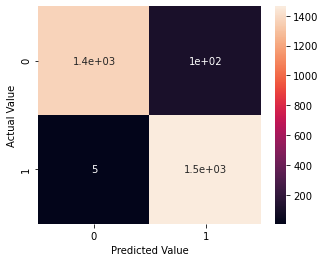

In [131]:
plt.figure(figsize=(5,4))
sns.heatmap(cmRandom, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [136]:
print(cm) #GRIDSEARCH
print("******************************")
print(cmRandom) #RANDOMSEARCH 

[[1374  101]
 [   5 1463]]
******************************
[[1371  104]
 [   5 1463]]
